In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_NORMAL_500_v2.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,2.660293,3.056744,-54.787036,147.531109,-127.049232,92.973527,-106.050250,86.720460,-28.215510,105.774728,...,-78.753511,10.121191,-79.401384,137.907317,33.417117,NaN,NaN,NaN,0.618168,0.0
1,43.003942,-137.208256,80.354776,-13.665030,95.036263,68.104365,135.226084,-17.488579,-83.678686,208.638704,...,-168.042861,-36.327714,-39.011280,-31.864061,103.265420,NaN,NaN,NaN,0.518792,0.0
2,9.471141,63.497215,-31.482380,-103.339378,202.875207,-8.517136,-61.251503,113.188059,110.701716,48.484166,...,72.351982,-6.083924,47.765295,-120.517771,133.320785,NaN,NaN,NaN,0.377066,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.695814
std        0.213933
min        0.162652
25%        0.489618
50%        0.760636
75%        0.894511
max        0.999123
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "fitness": logloss_fitness,
    "dist_function": "dtw",
    "apply_differencing": True,
    "population_size": 100,
    "max_shaps": 10,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <function gendis.shapelets_distances.dtw(timeseries_matrix, shaps, distances)>,
 'dist_func_returns': True,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': True,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 10,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.103		-4e-06	1.9821
2		-0.0154		-2e-06	2.102
3		-0.0		-2e-06	1.7897
4		-0.001		-1e-06	1.8818
5		-0.0		-1e-06	1.9028
6		-0.0		-1e-06	2.2046
7		-0.0		-1e-06	1.7508
8		-0.0		-1e-06	1.6861
9		-0.0		-1e-06	1.5045
10		-0.0		-1e-06	1.6829
11		-0.0		-1e-06	1.5388
12		-0.0		-1e-06	1.6688
13		-0.0		-0.0	1.7167
14		-0.0		-0.0	1.7049
15		-0.0		-0.0	1.753
16		-0.0		-0.0	1.7553
17		-0.0		-0.0	2.0373
18		-0.0		-0.0	2.3867
19		-0.0		-0.0	2.2442
20		-0.0		-0.0	2.3989
21		-0.0		-0.0	2.5847
22		-0.0		-0.0	2.6223
23		-0.0		-0.0	2.5825
24		-0.0		-0.0	2.6378
25		-0.0		-0.0	2.7074
26		-0.0		-0.0	2.6657
27		-0.0		-0.0	2.6974
28		-0.0		-0.0	2.9422
29		-0.0		-0.0	2.687
30		-0.0		-0.0	2.7583
31		-0.0		-0.0	2.951
32		-0.0		-0.0	2.7642
33		-0.0		-0.0	2.7039
34		-0.0		-0.0	2.8761
35		-0.0		-0.0	2.9852
36		-0.0		-0.0	2.8261
37		-0.0		-0.0	3.1354
38		-0.0		-0.0	3.0435
39		-0.0		-0.0	3.1668
40		-0.0		-0.0	2.7409
41		-0.0		-0.0	2.989
42		-0.0		-0.0	3.1902
43		-0.0		-0.0	3.0226
44		-0.0		-0.0	3.4

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 2.43 s, sys: 15.8 ms, total: 2.45 s
Wall time: 2.44 s


In [15]:
distances[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


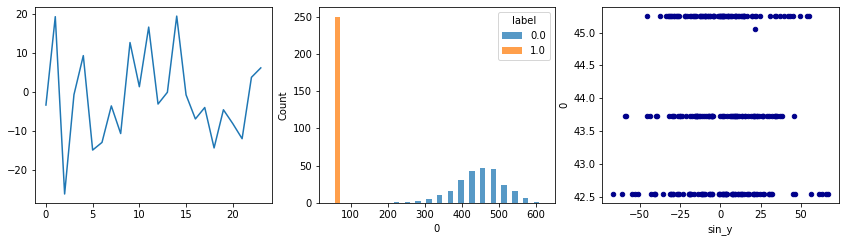

Testing separation for shapelet 1
Accuracy = 1.0
[[200   0]
 [  0 200]]


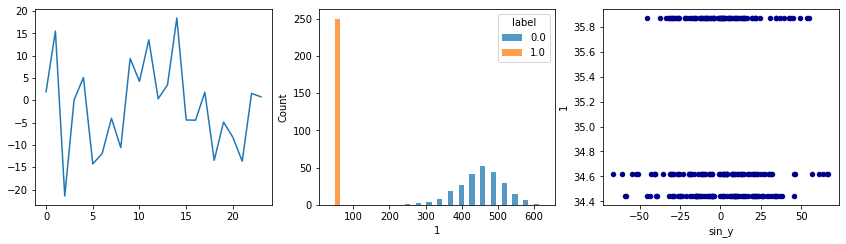

Testing separation for shapelet 2
Accuracy = 1.0
[[200   0]
 [  0 200]]


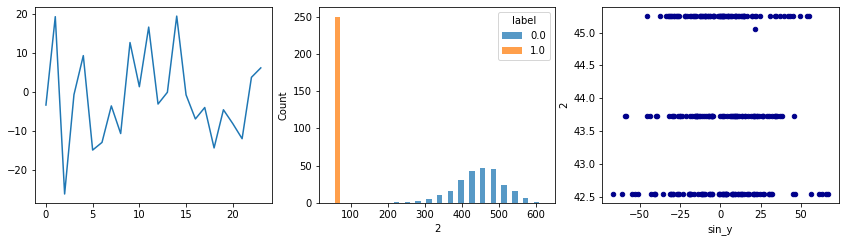

Testing separation for shapelet 3
Accuracy = 1.0
[[200   0]
 [  0 200]]


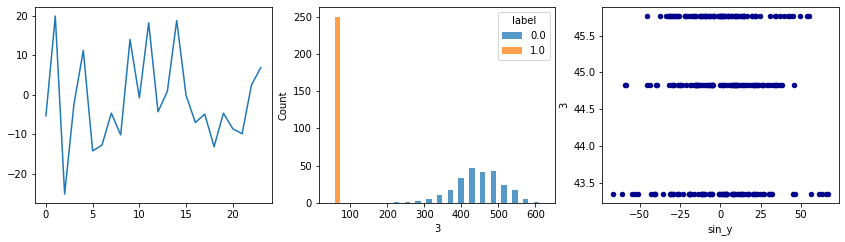

Testing separation for shapelet 4
Accuracy = 1.0
[[200   0]
 [  0 200]]


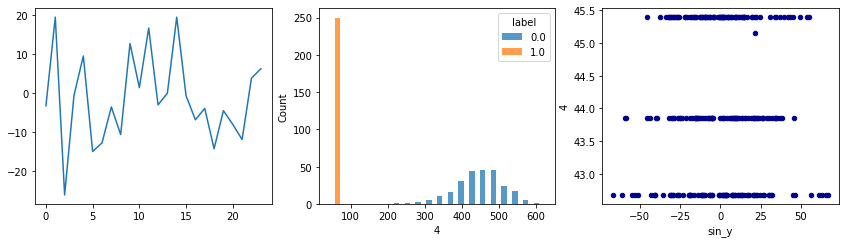

Testing separation for shapelet 5
Accuracy = 1.0
[[200   0]
 [  0 200]]


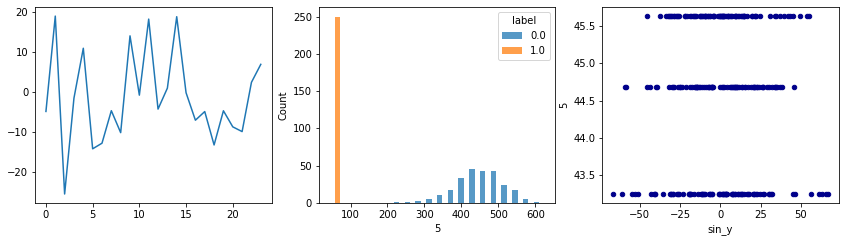

Testing separation for shapelet 6
Accuracy = 1.0
[[200   0]
 [  0 200]]


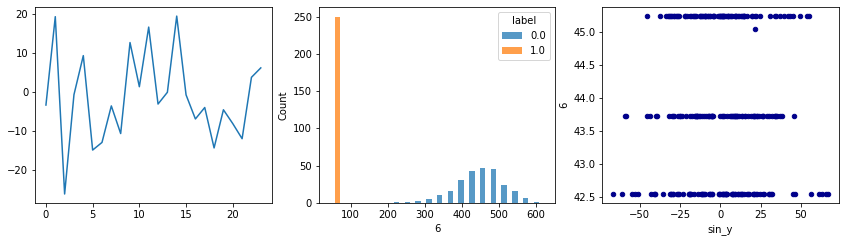

Testing separation for shapelet 7
Accuracy = 1.0
[[200   0]
 [  0 200]]


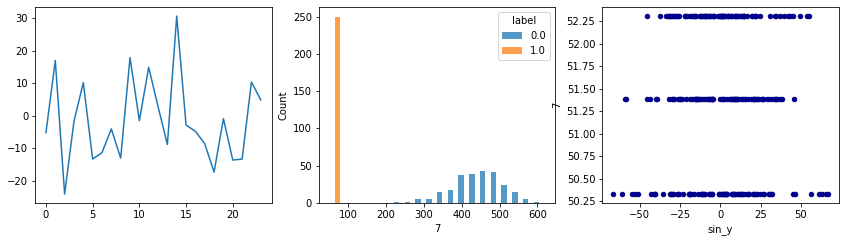

Testing separation for shapelet 8
Accuracy = 0.545
[[116  84]
 [ 98 102]]


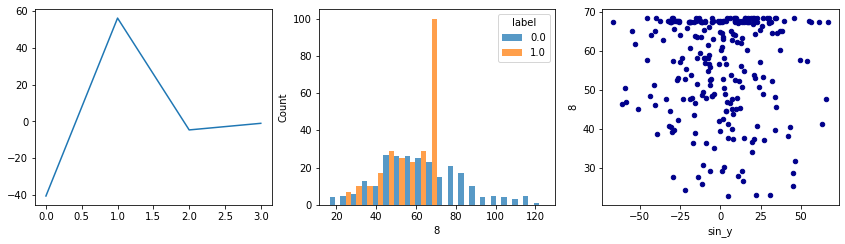

Testing separation for shapelet 9
Accuracy = 1.0
[[200   0]
 [  0 200]]


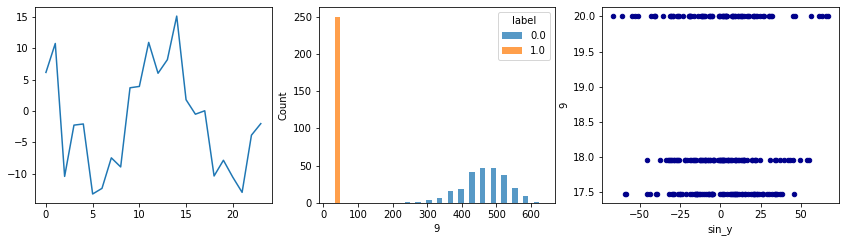

Testing separation for shapelet 10
Accuracy = 1.0
[[200   0]
 [  0 200]]


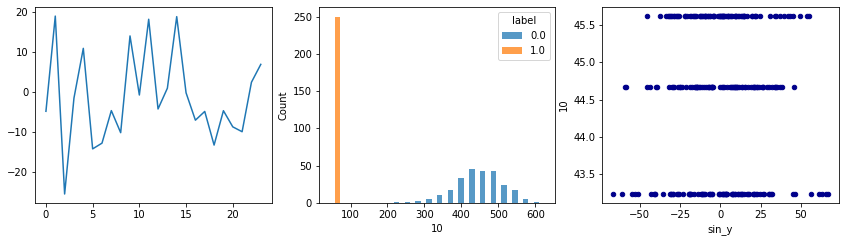

Testing separation for shapelet 11
Accuracy = 1.0
[[200   0]
 [  0 200]]


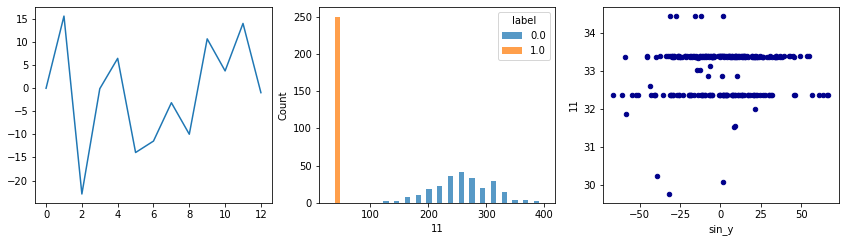

Testing separation for shapelet 12
Accuracy = 1.0
[[200   0]
 [  0 200]]


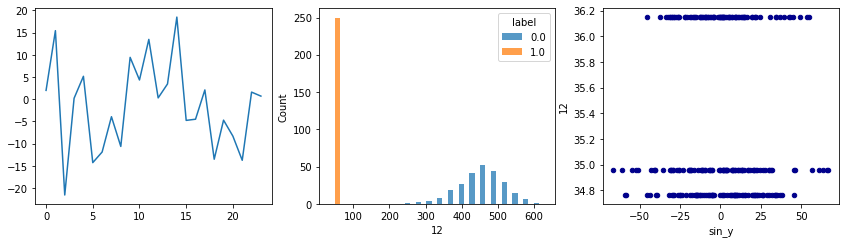

Testing separation for shapelet 13
Accuracy = 1.0
[[200   0]
 [  0 200]]


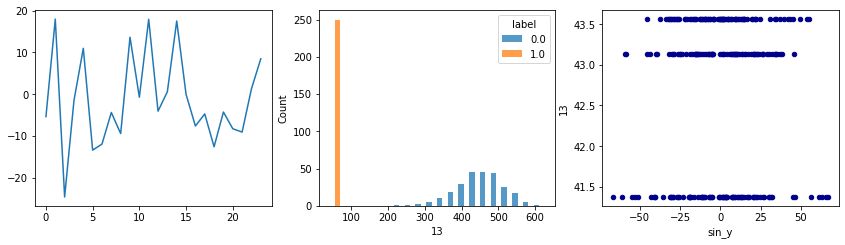

In [17]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i
    )